In [1]:
from pathlib import Path

In [2]:
import cv2
import towhee
from pymilvus import Collection
from towhee._types.image import Image

In [3]:
import embedding
from connection import create_collection

In [4]:
DATASET = Path("data/rikai/")
TEST_IMAGE = Path("test_image.png")

In [5]:
def read_images(results):
    return [
        Image(cv2.imread(result.id), "BGR")
        for result in results
    ]

In [8]:
collection = create_collection("face_search", dim=512)

In [11]:
(
    towhee
    .glob["path"](str(DATASET / "**/*.png"))
    .image_decode["path", "image"]()
    .extract_embedding["image", "embedding"]()
    .ann_insert.milvus[("path", "embedding"), "mr"](collection=collection)
)

[<Entity dict_...ding', 'mr'])>, <Entity dict_...ding', 'mr'])>, <Entity dict_...ding', 'mr'])>, <Entity dict_...ding', 'mr'])>, <Entity dict_...ding', 'mr'])>, <Entity dict_...ding', 'mr'])>, ...]

In [6]:
collection = Collection("face_search")
collection.load()


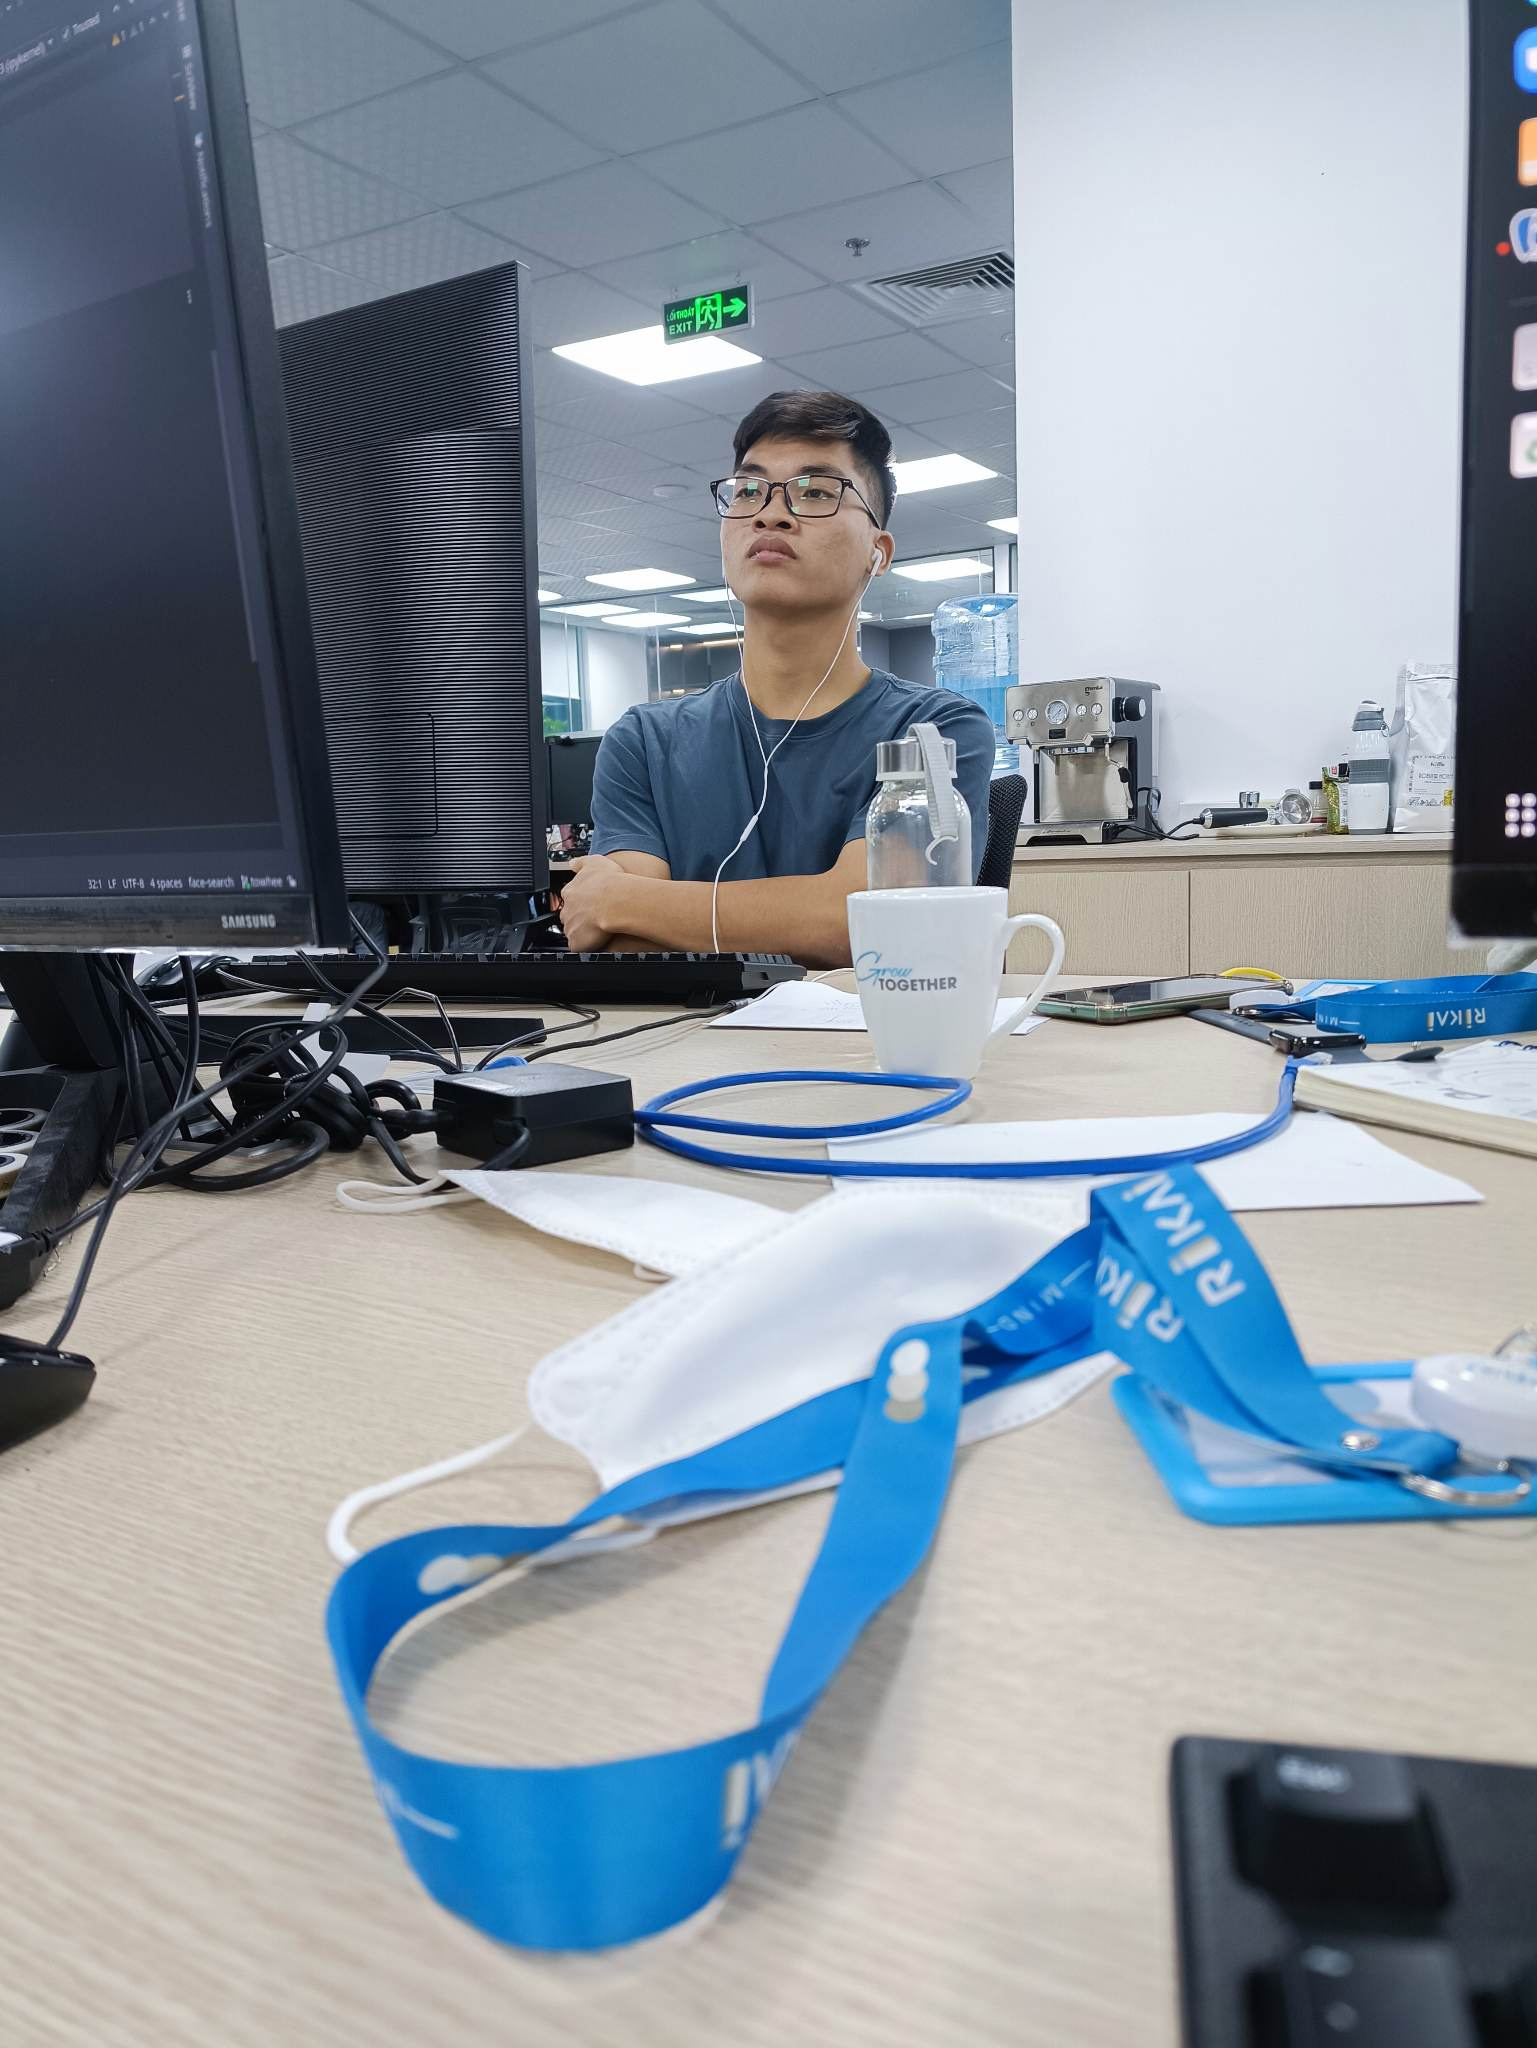
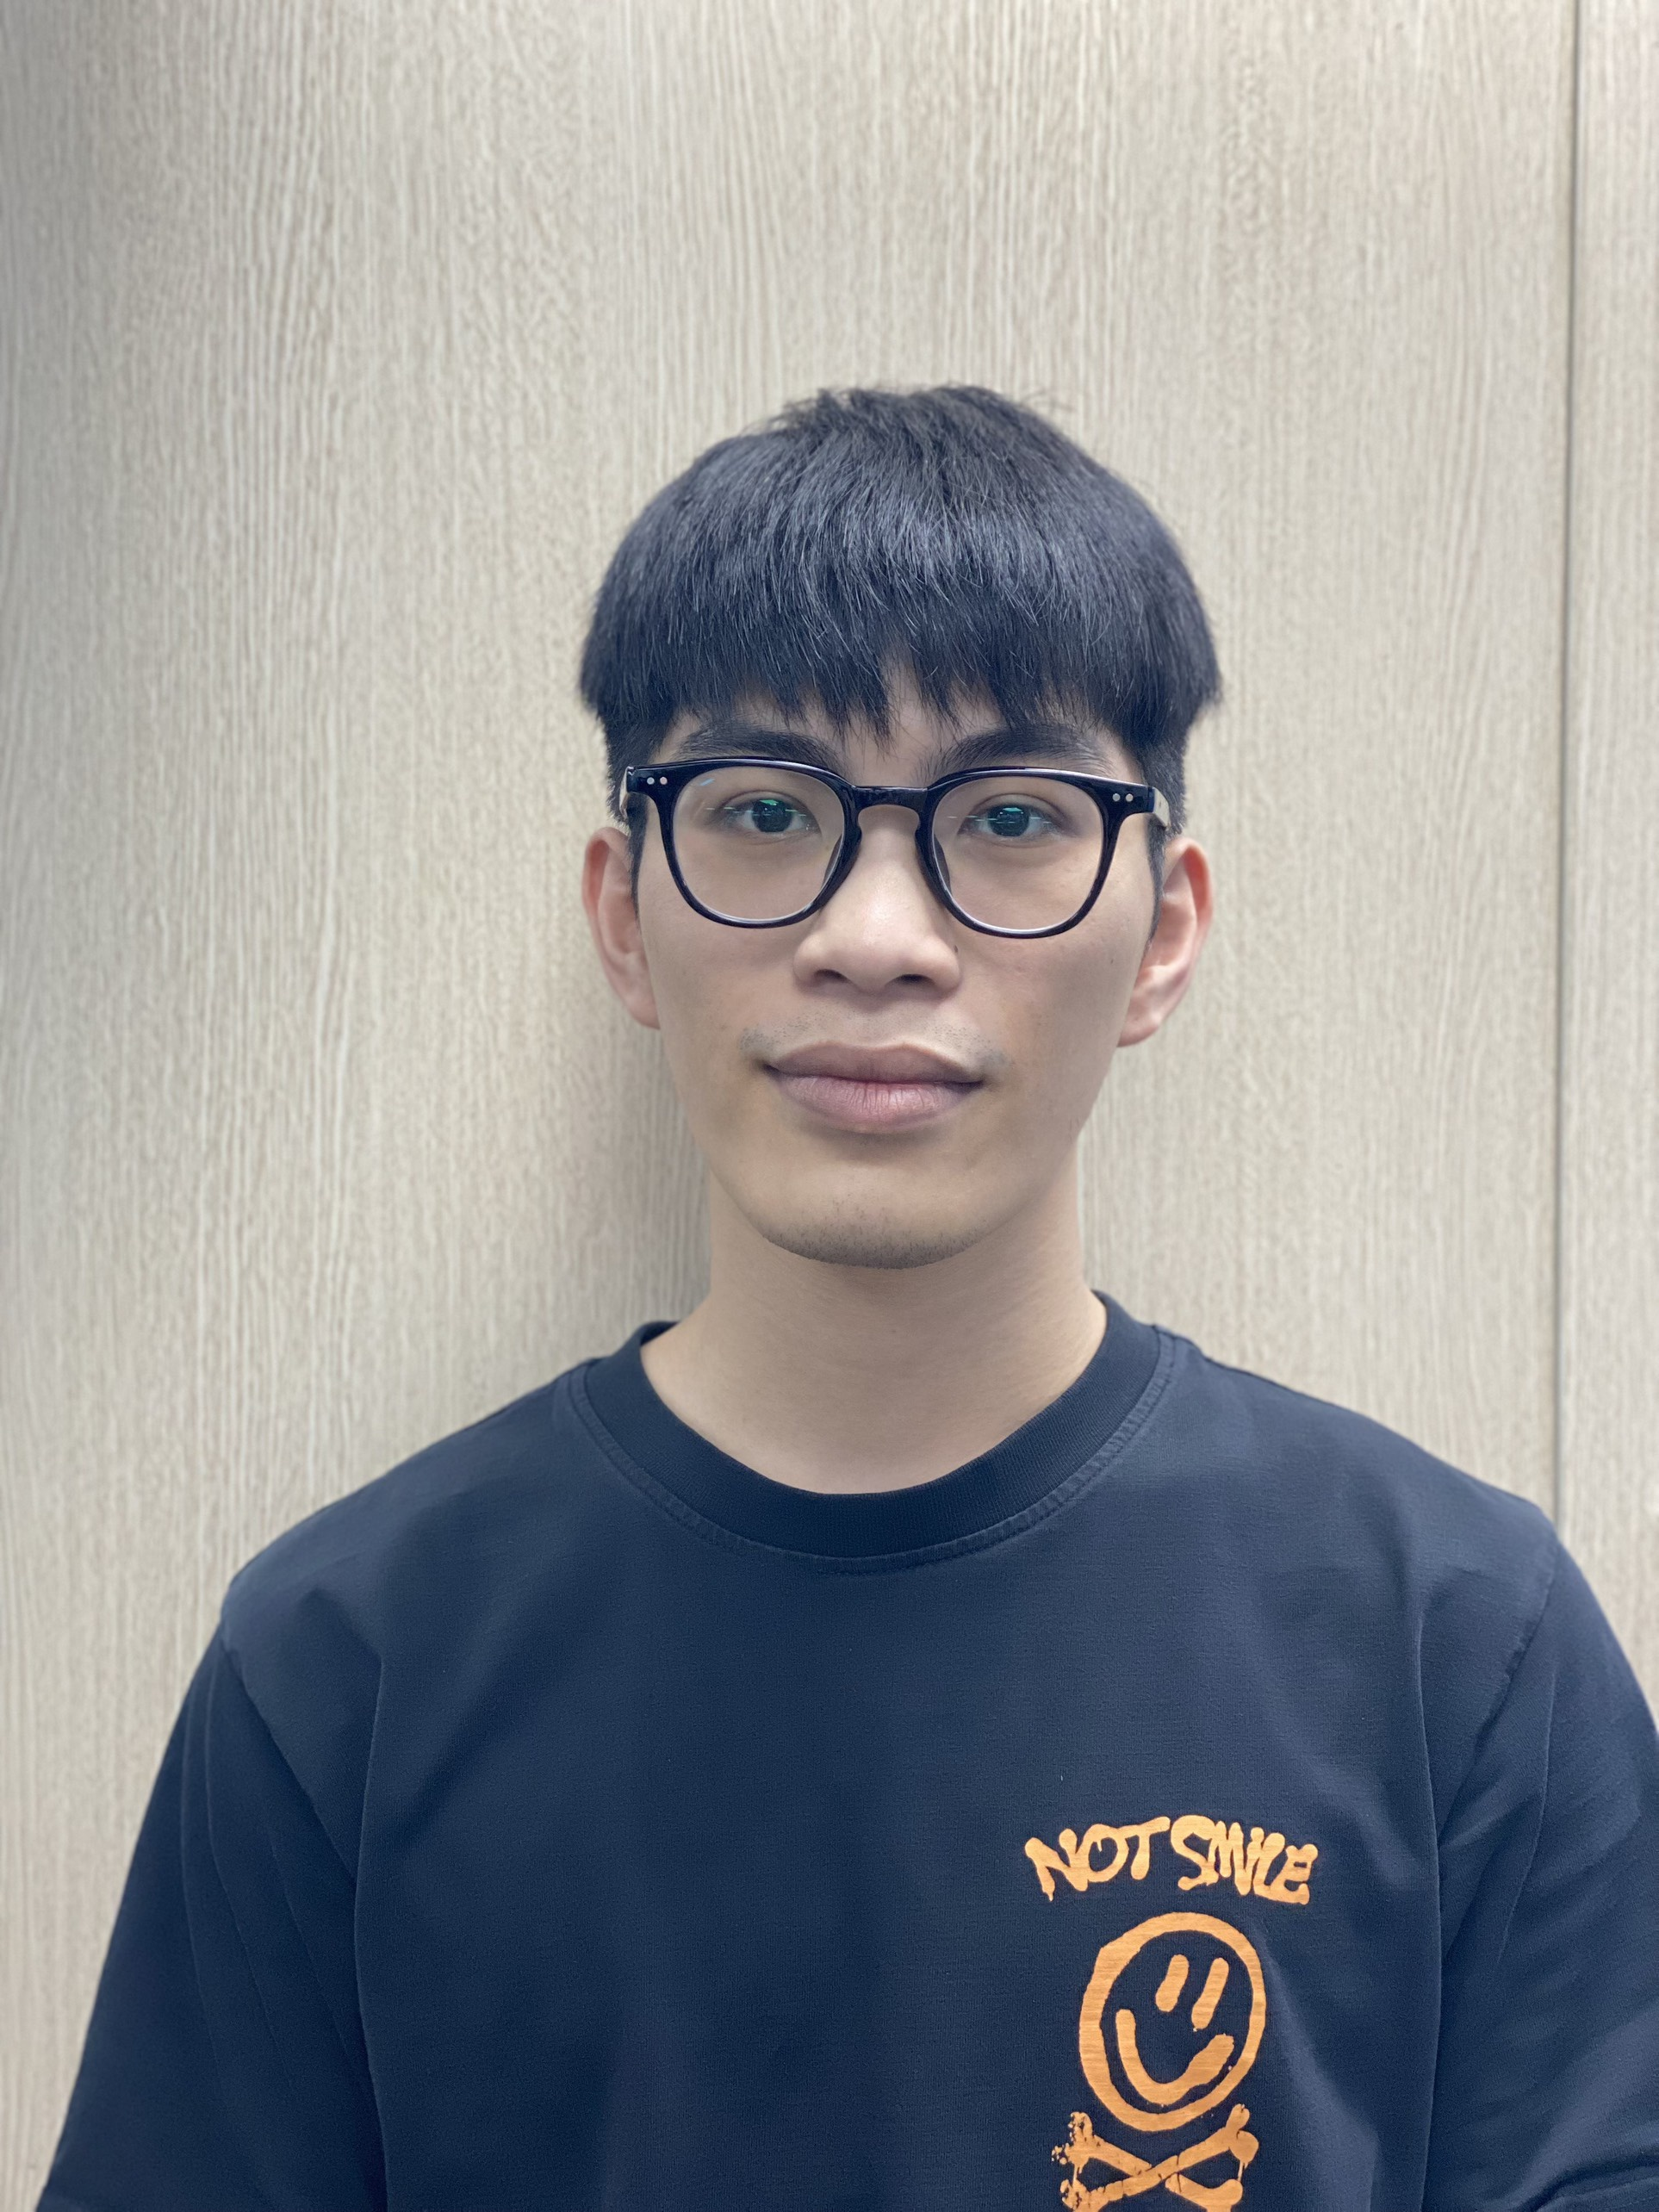
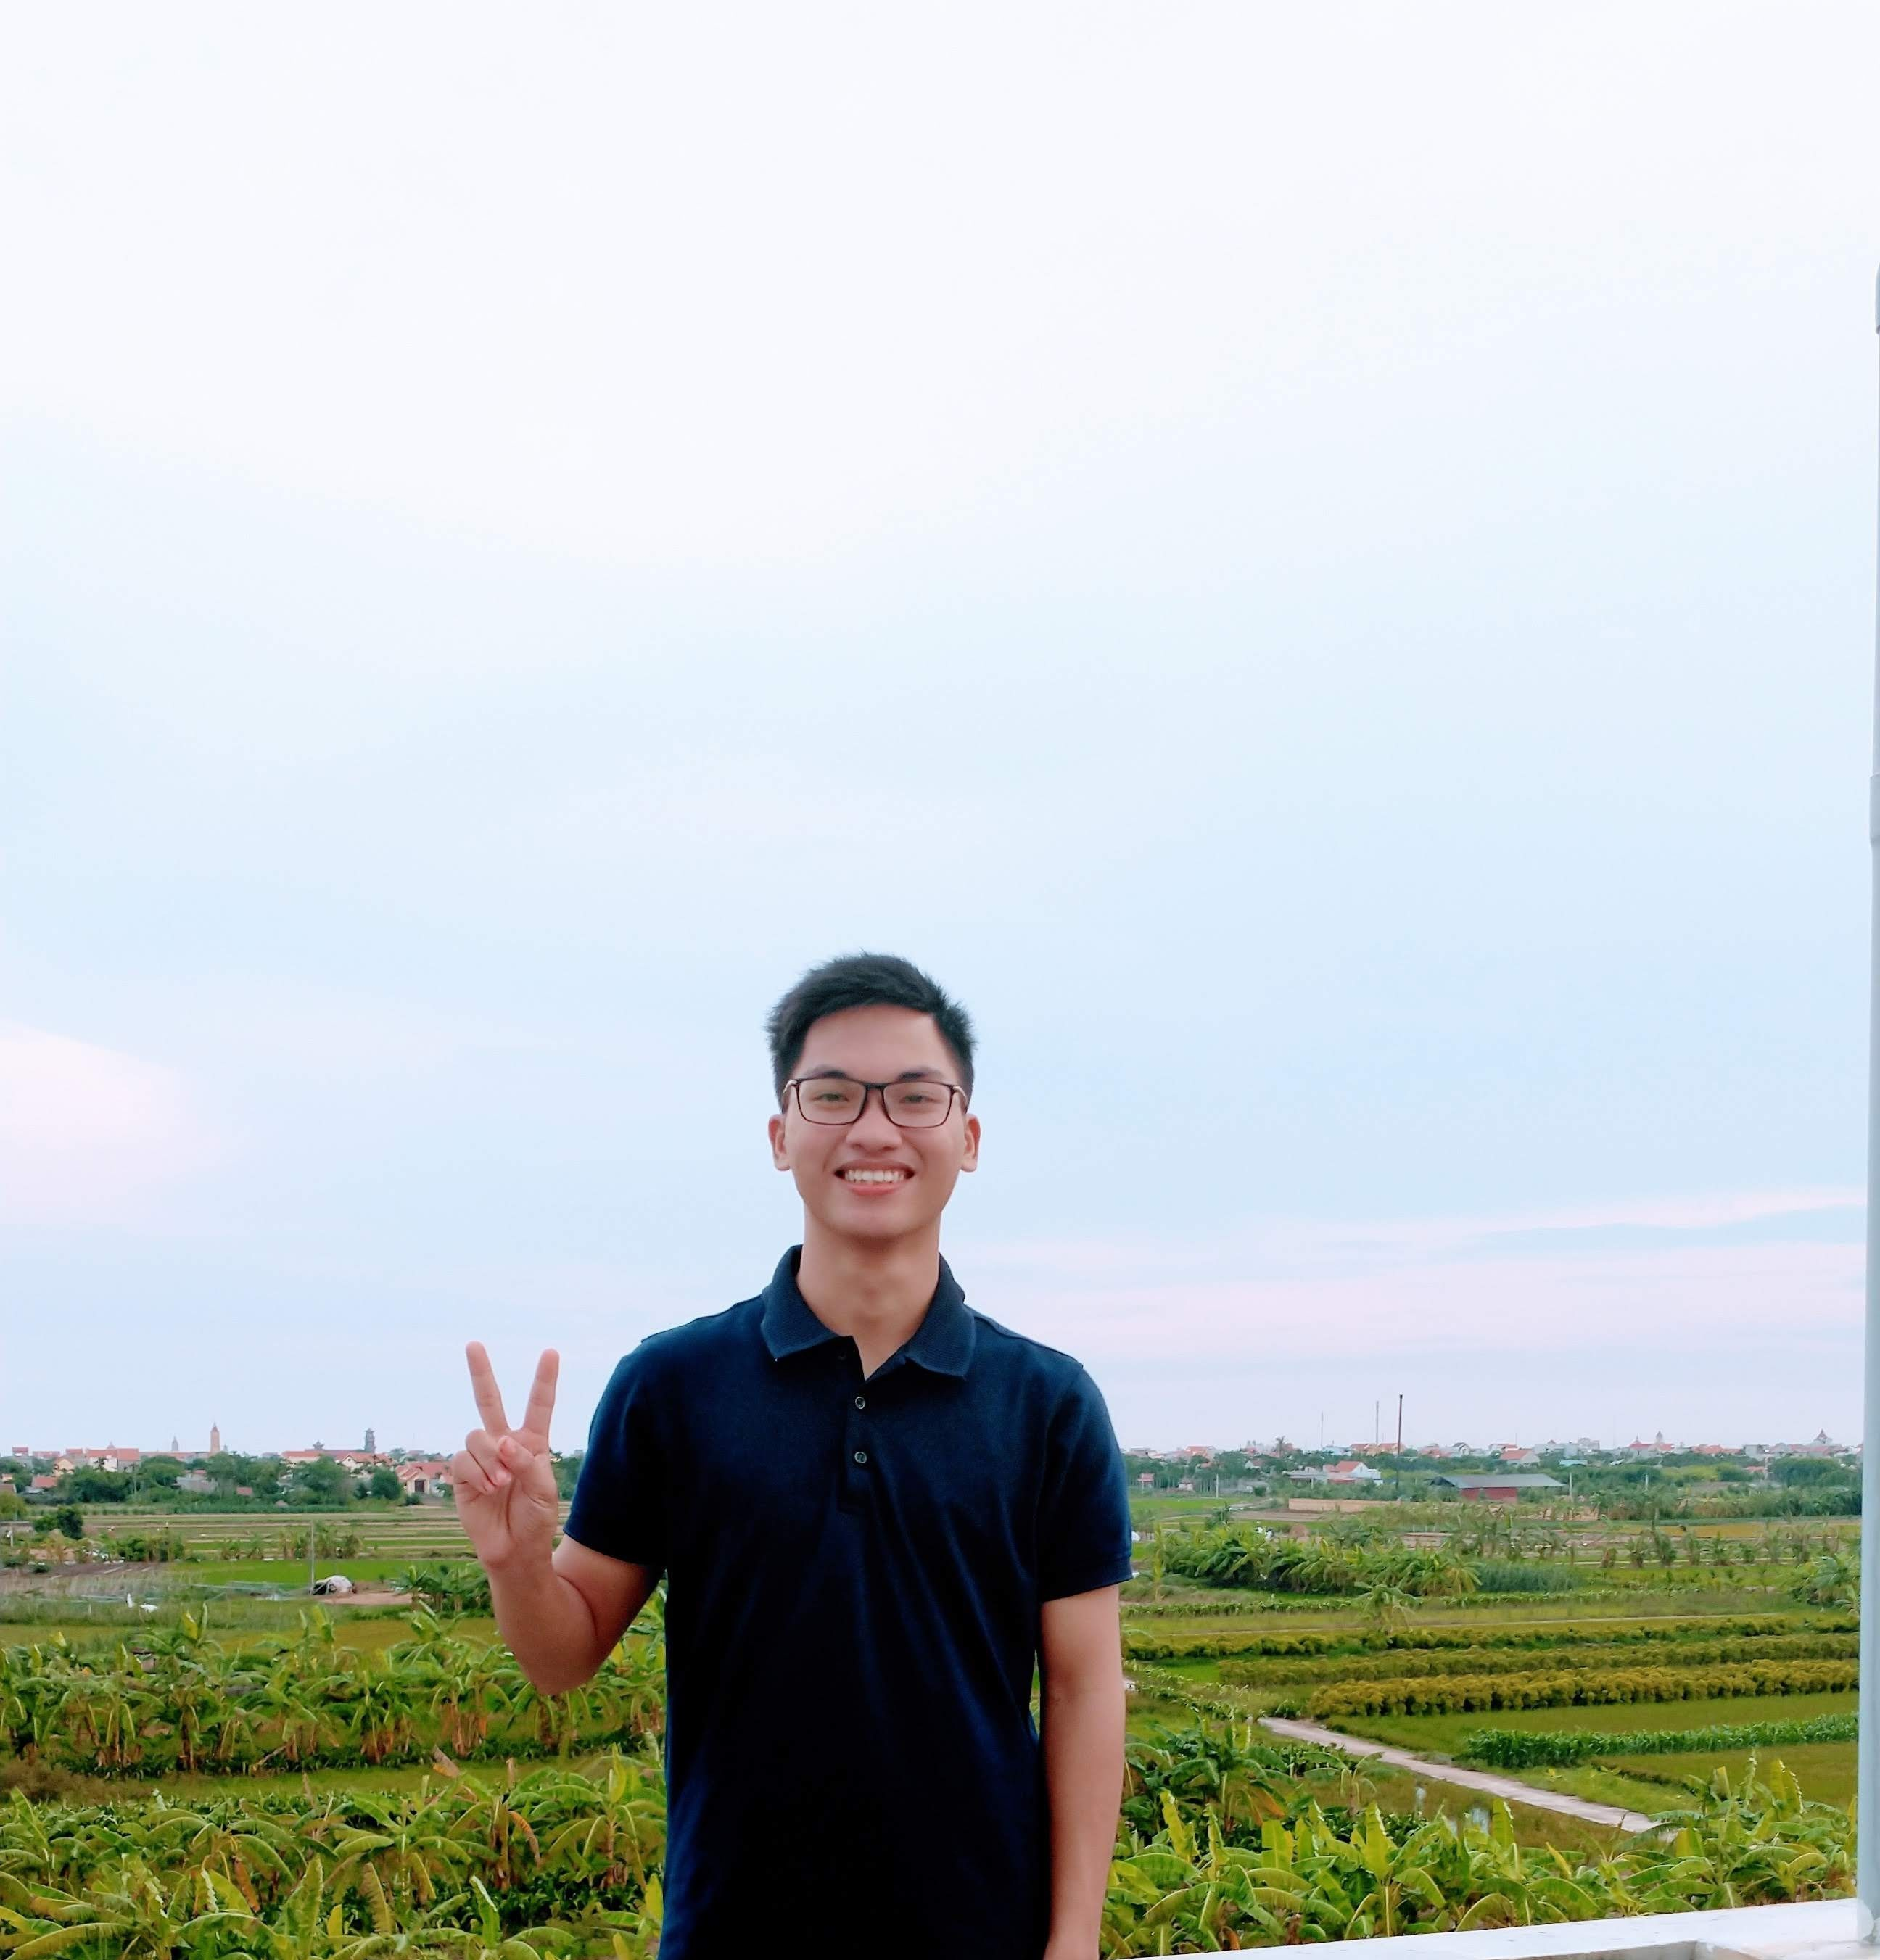
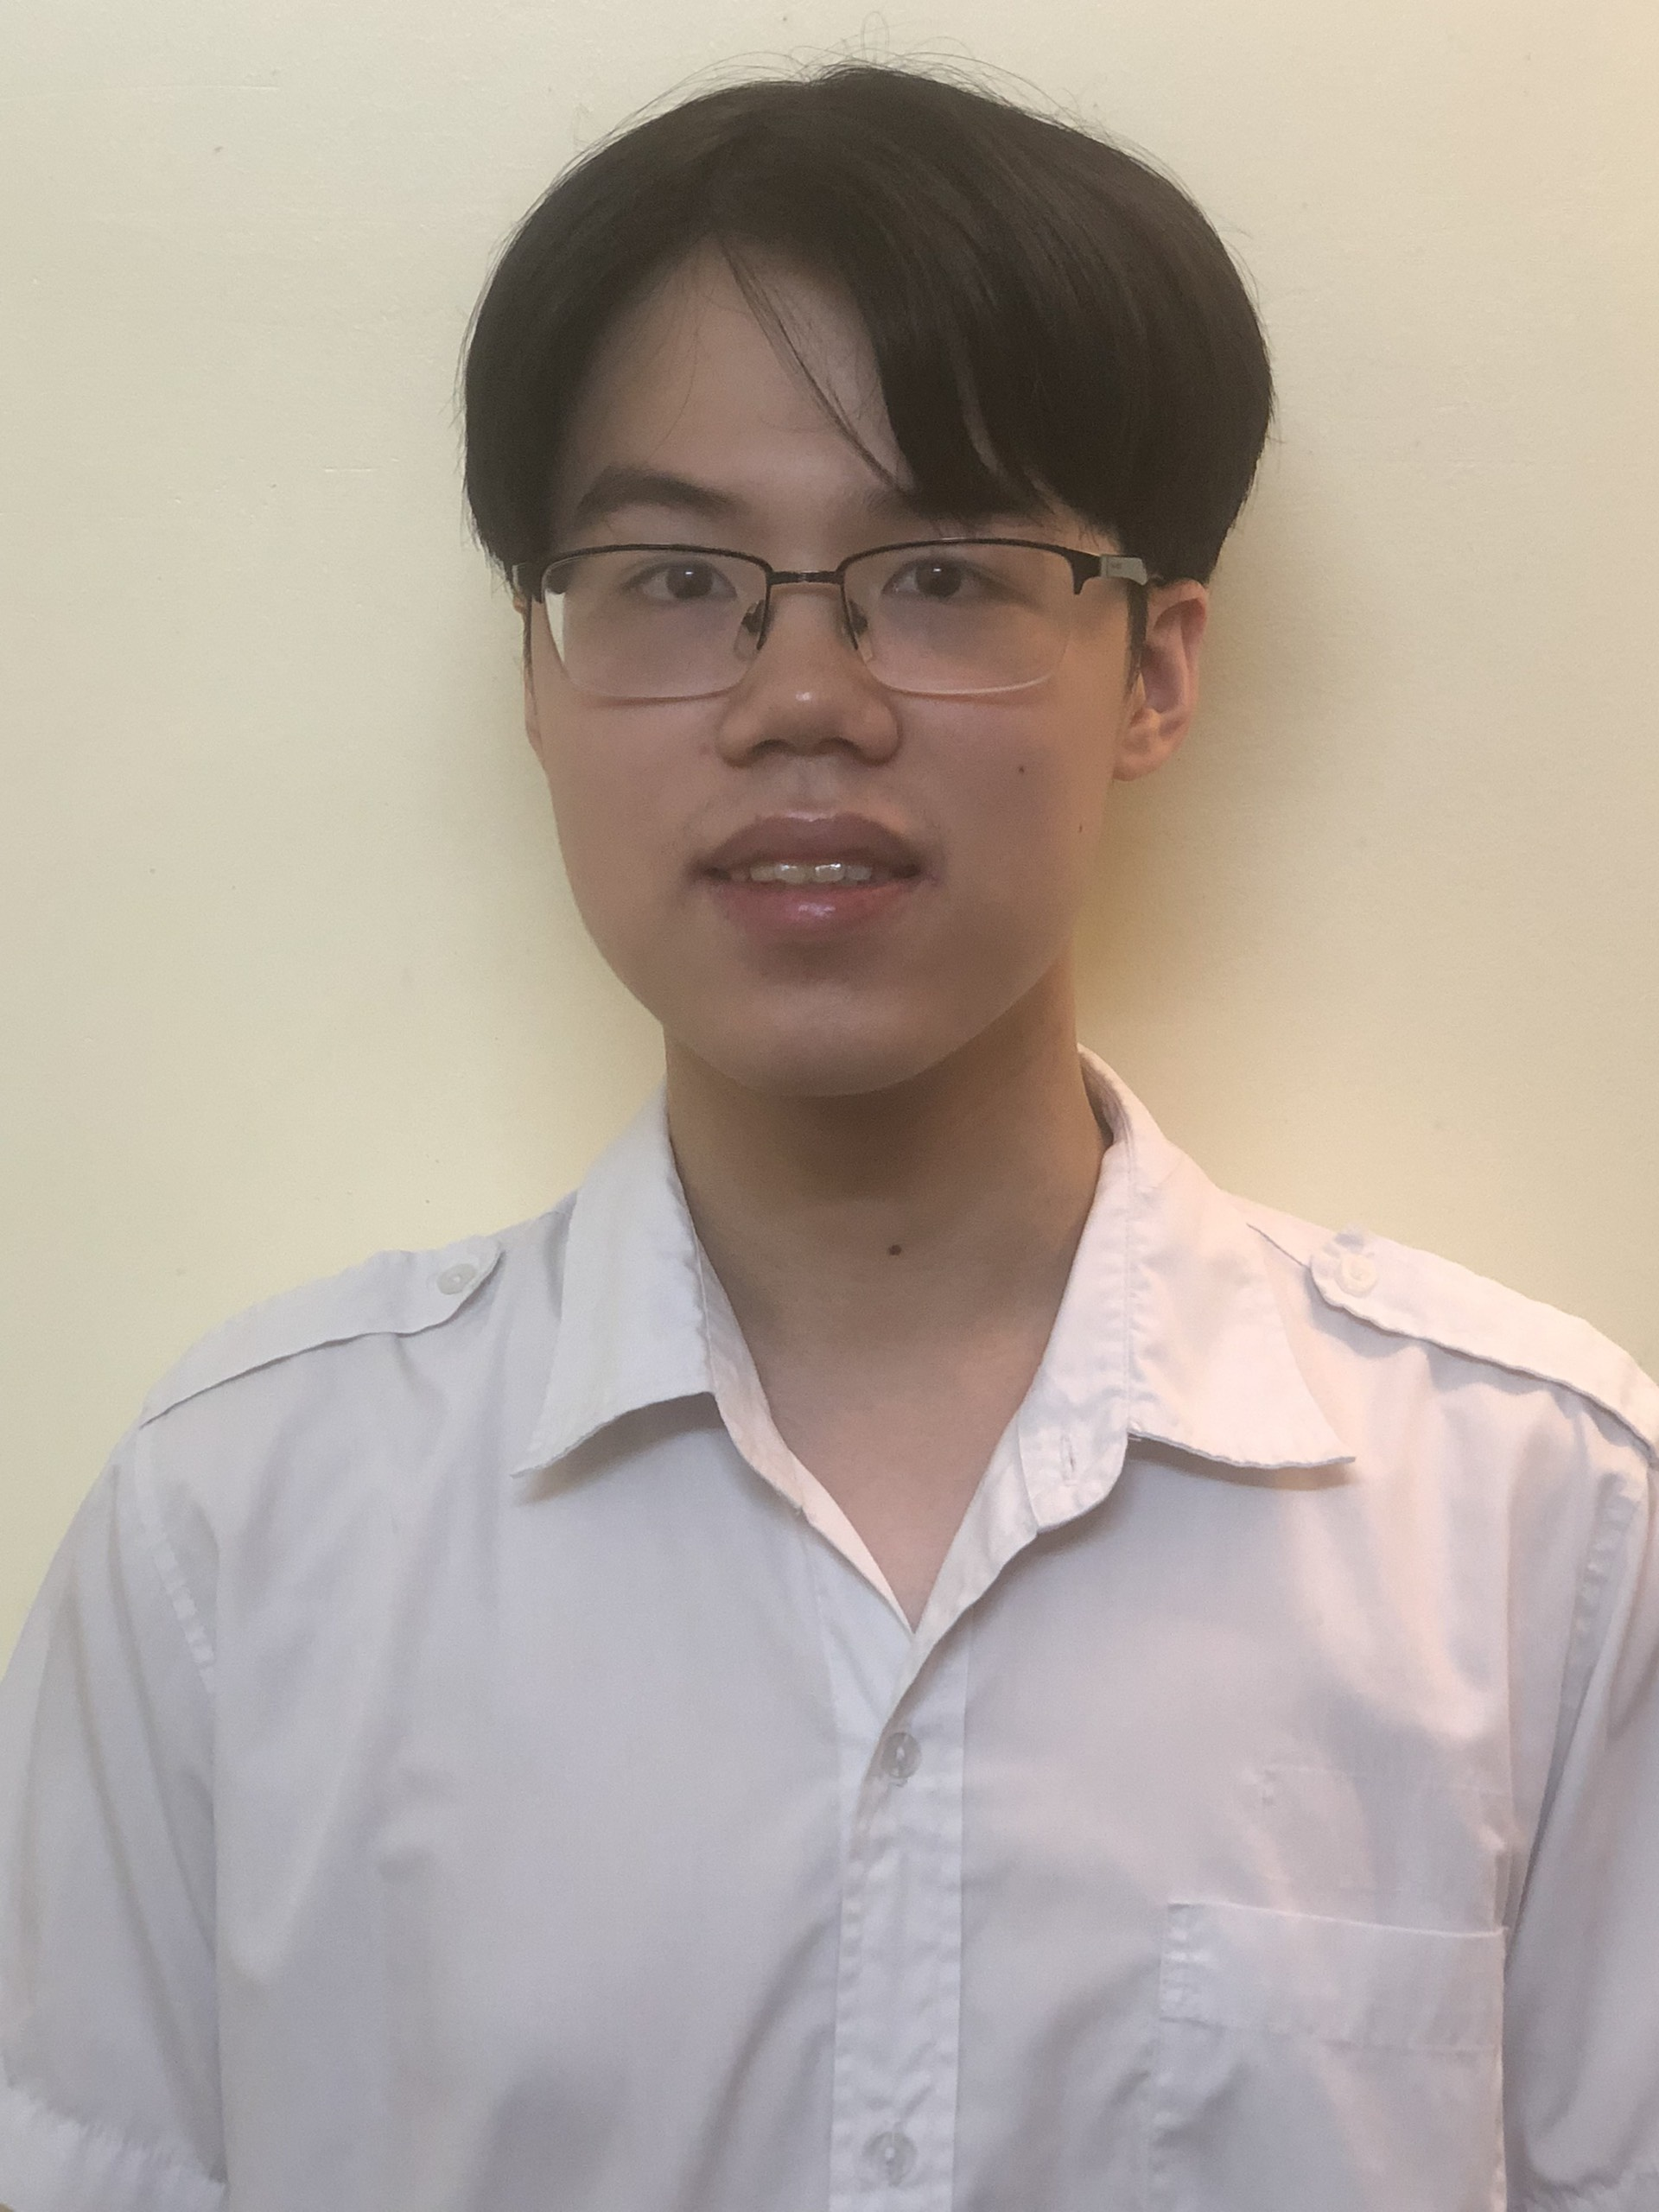
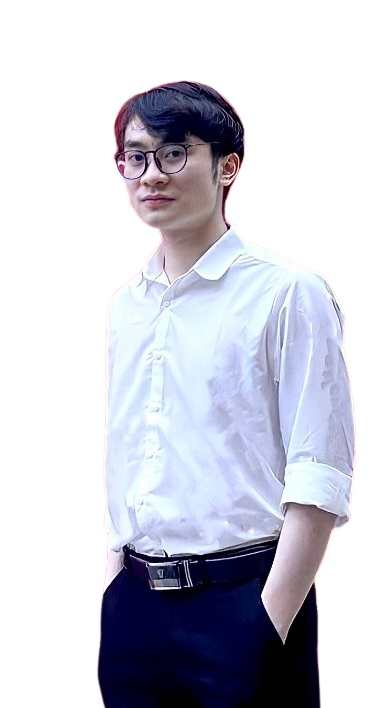
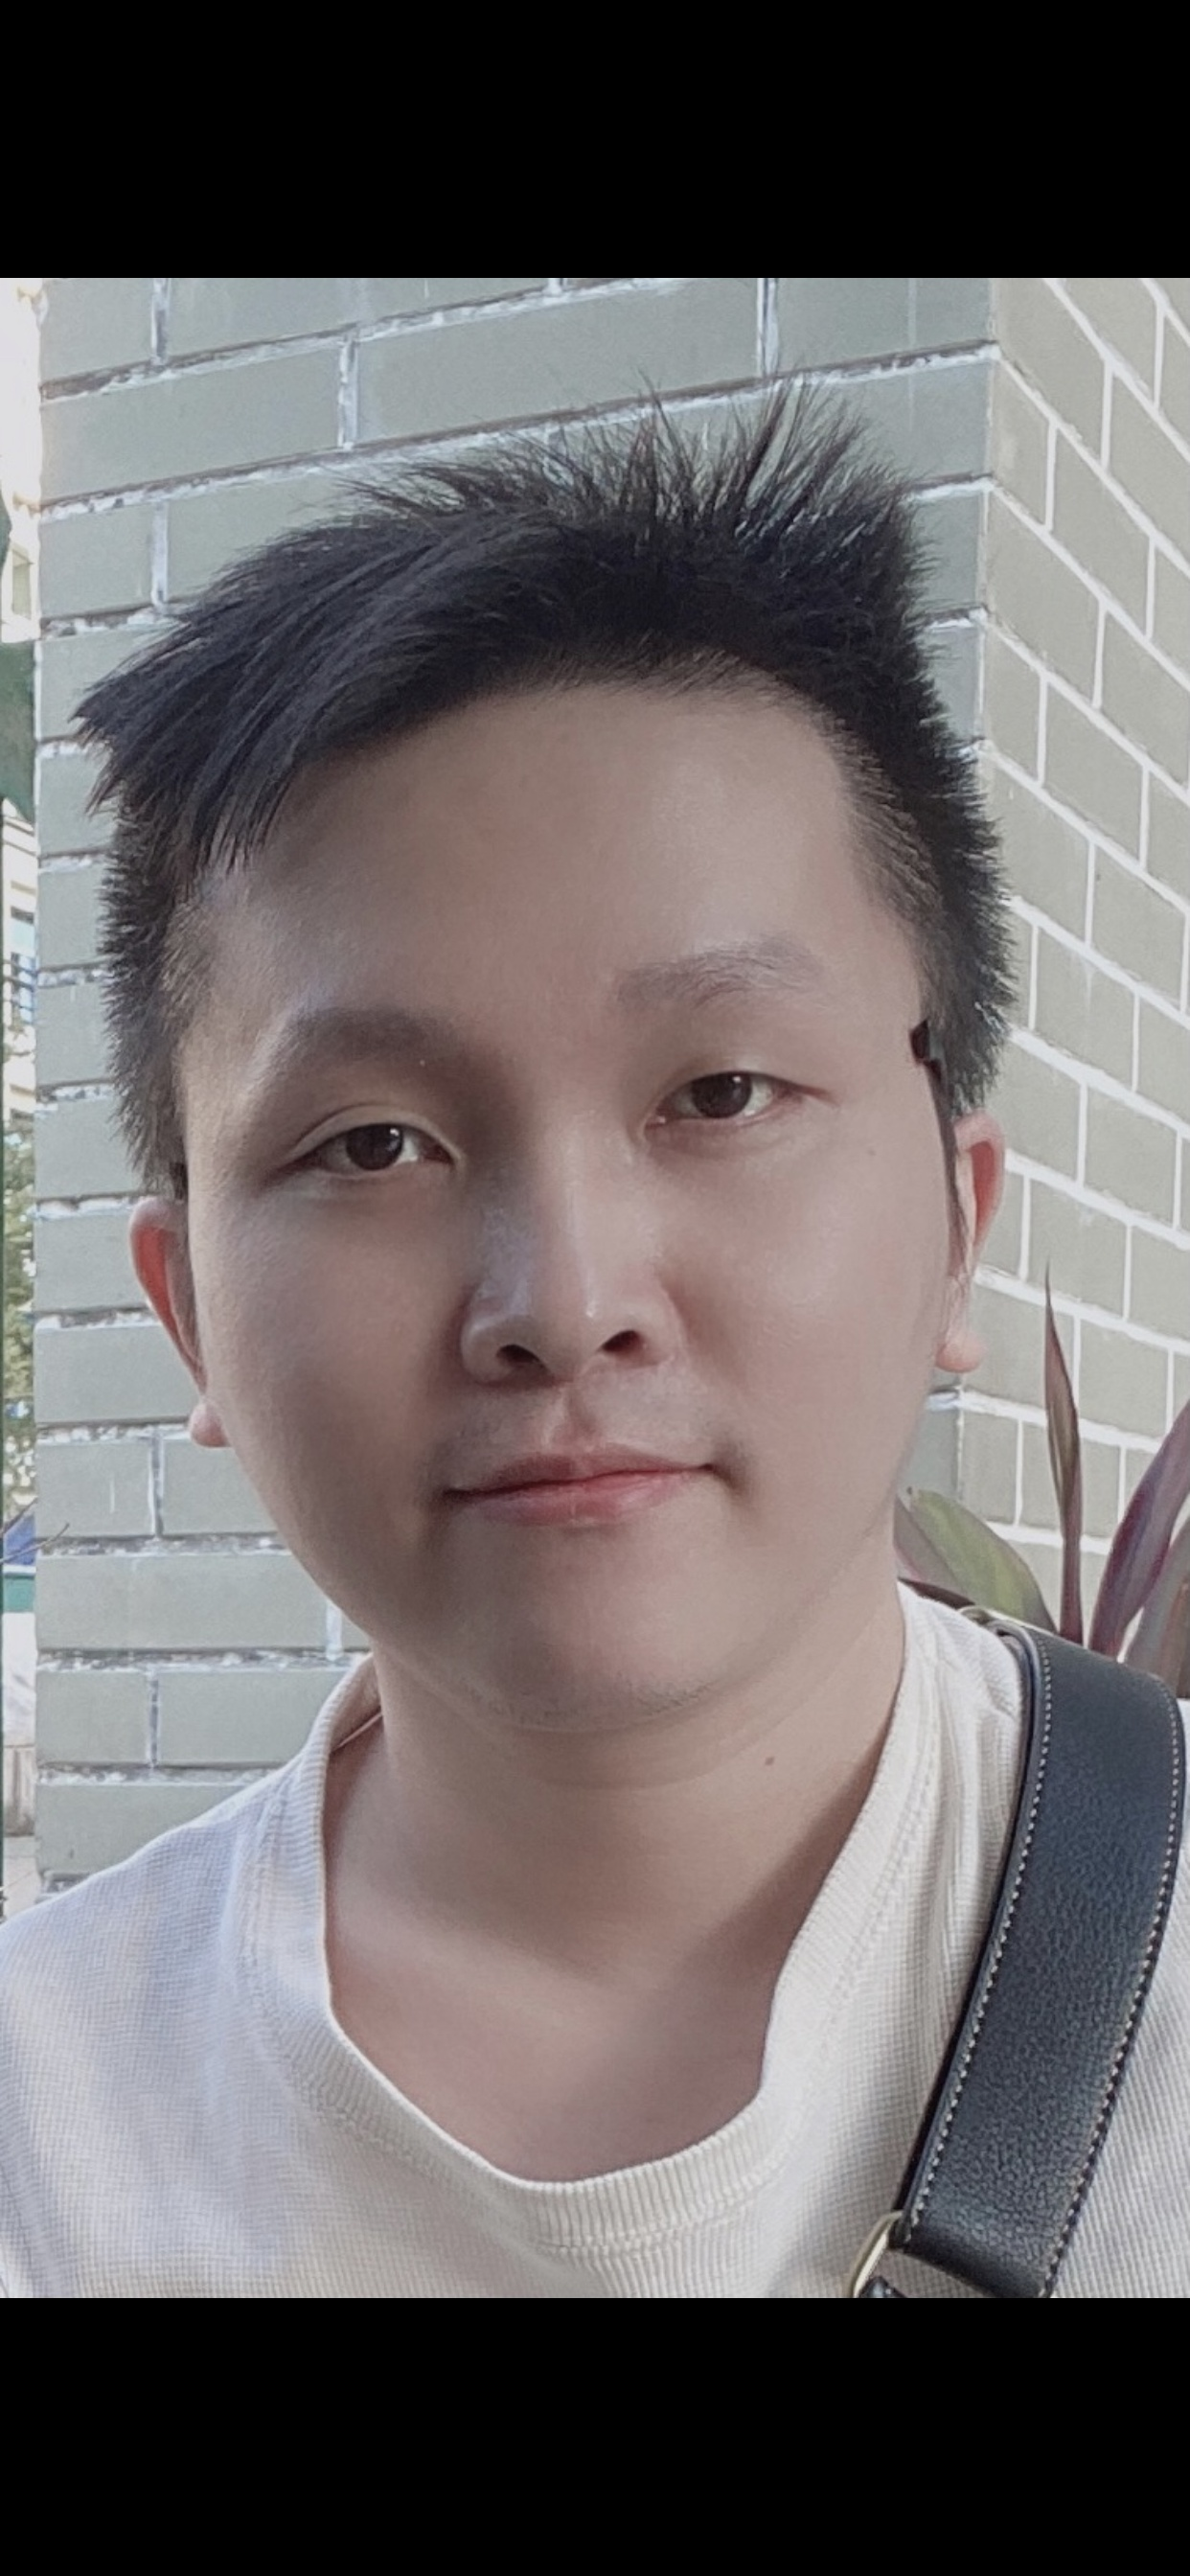

In [7]:
(
    towhee
    .glob["path"](str(TEST_IMAGE))
    .image_decode["path", "image"]()
    .extract_embedding["image", "embedding"]()
    .ann_search.milvus["embedding", "results"](collection=collection, limit=5)
    .runas_op["results", "result_images"](func=read_images)
    .select["image", "result_images"]()
    .show()
)